In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


In [0]:
# additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, GlobalMaxPooling2D, Flatten, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [0]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten() # targets are 2D arrays Nx1, tensorflow expects vector of N
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)

170500096/170498071 [==============================] - 6s 0us/step
x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [0]:
# number of classes 
K = len(set(y_train))

In [0]:
# Build the model using Keras functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3,3), strides=2, activation='relu')(x)

x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [0]:
# Compile and fit
# Note: make sure you are using GPU for this!
# Fit with data augmentation
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0]//batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), 
              steps_per_epoch=steps_per_epoch, epochs = 50)

  ...
    to  
  ['...']
Train for 1562 steps, validate on 10000 samples
Epoch 1/50
1562/1562 [==============================] - 33s 21ms/step - loss: 1.3869 - accuracy: 0.5037 - val_loss: 1.1080 - val_accuracy: 0.5973
Epoch 2/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.9635 - accuracy: 0.6609 - val_loss: 0.8653 - val_accuracy: 0.6958
Epoch 3/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.8264 - accuracy: 0.7133 - val_loss: 0.7313 - val_accuracy: 0.7439
Epoch 4/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.7492 - accuracy: 0.7415 - val_loss: 0.6921 - val_accuracy: 0.7594
Epoch 5/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.6896 - accuracy: 0.7623 - val_loss: 0.8226 - val_accuracy: 0.7211
Epoch 6/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.6484 - accuracy: 0.7774 - val_loss: 0.6516 - val_accuracy: 0.7772
Epoch 7/50
1562/1562 [=============================

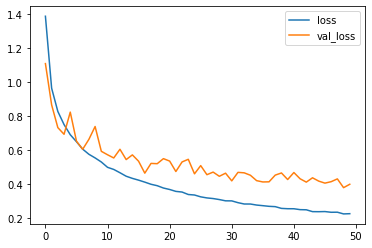

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend() # some chance of overfitting

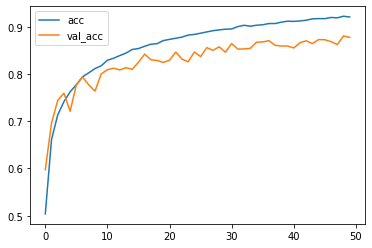

In [0]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label ='acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend() # training acc does not converge

In [0]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'
  """
  if normalize:
    cm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
    print("Normalized Confusion Matrix")

  else:
    print("Confusion matrix, without normalization")

  # print(cm)
  plt.imshow(cm, interpolation='nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt),
             horizontalalignment='center',
             color = 'white' if cm[i,j] > thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

Confusion matrix, without normalization


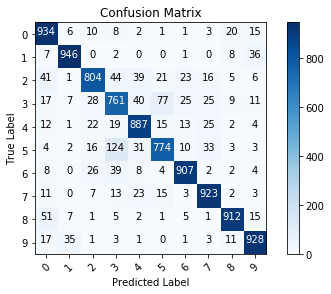

In [0]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(K)))

In [0]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

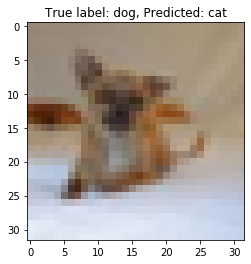

In [0]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s, Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [0]:
# Now that the model is so large, it's useful to summarize it
model.summary() 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0     